# Groupe 3 : Projet Machine Learning

## Introduction

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

In [41]:
dataset = pd.read_csv('scitweets_export.tsv', sep='\t')
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",Knees are a bit sore. i guess that's a sign that my recent treadmilling is working,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",Can any Gynecologist with Cancer Experience explain the dangers of Transvaginal Douching with Fluoride or other toxins such as Dioxin? #PDX,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",Couch-lock highs lead to sleeping in the couch. Gotta stop doing this shit.,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",Does daily routine help prevent problems with bipolar disorder http://t.co/XGUfUDoLJB,1,1.0,0.0,0.0


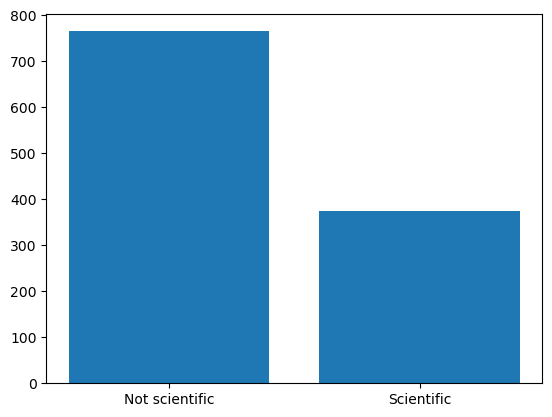

In [42]:
not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

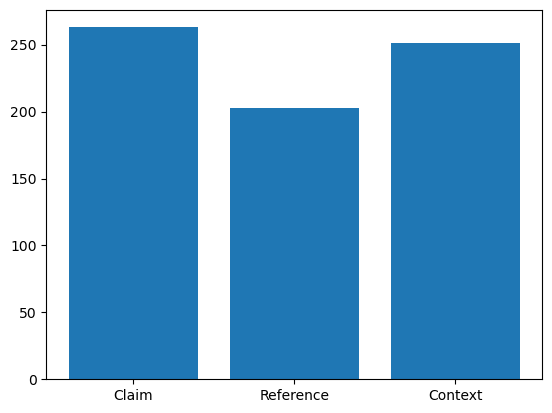

In [43]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

In [44]:
#!pip install contractions
#!pip install pyenchant

#!pip install pyenchant --upgrade


[nltk_data] Downloading package stopwords to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



OPTIMISATION ET ÉVALUATION DE LOGISTIC REGRESSION

Recherche des meilleurs hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/tiziri-tamani/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Meilleurs paramètres: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       147
           1       0.96      0.90      0.93       159

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306

Test Accuracy: 0.9281

Cross-Validation Results (k=10):
Accuracy scores: [0.92810458 0.93464052 0.94771242 0.91503268 0.88235294 0.94771242
 0.92810458 0.94117647 0.94771242 0.95424837]
Mean accuracy: 0.9327 (±0.0203)

OPTIMISATION ET ÉVALUATION DE NAIVE BAYES

Recherche des meilleurs hyperparamètres pour Naive Bayes...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Meilleurs paramètres: {'alpha': 0.1, 'fit_prior': True}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.94   

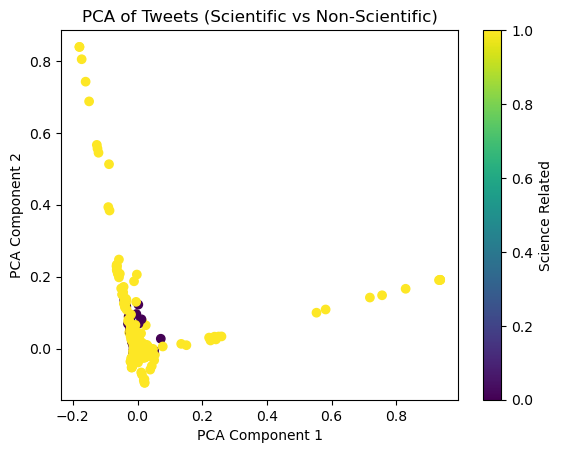

In [45]:
#meme code que precedent juste ajoute de hyperparmetre 
# Importations nécessaires***************************a garder hi ciaran et raphaelle et dalia  je suis la ************************************
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Chargement des données
file_path = 'scitweets_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte (identique à votre version)
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Vectorisation et SMOTE (identique)
X = df['cleaned_text']
y_binary = df['science_related']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)
X_vec = vectorizer.fit_transform(X)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vec, y_binary)

# Split train-test (identique)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Configuration KFold (identique)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionnaire des modèles AVEC leurs hyperparamètres à optimiser
models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Naive Bayes": {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0],
            'fit_prior': [True, False]
        }
    },
    "k-NN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Évaluation optimisée de chaque modèle
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"OPTIMISATION ET ÉVALUATION DE {name.upper()}")
    print(f"{'='*60}")
    
    # Optimisation par GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Validation croisée interne pour l'optimisation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\nRecherche des meilleurs hyperparamètres pour {name}...")
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres: {grid_search.best_params_}")
    
    # Évaluation sur le test set
    y_pred = best_model.predict(X_test)
    print("\nClassification Report sur le test set:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {best_model.score(X_test, y_test):.4f}")
    
    # Validation croisée k=10 avec le meilleur modèle (identique à votre configuration)
    cv_scores = cross_val_score(
        best_model,
        X_res,
        y_res,
        cv=kfold,
        scoring='accuracy'
    )
    
    print("\nCross-Validation Results (k=10):")
    print(f"Accuracy scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Visualisation PCA (identique)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Tweets (Scientific vs Non-Scientific)')
plt.colorbar(label='Science Related')
plt.show()

In [51]:
# ------------------------------------------------------------
# SOLUTION ULTIME - UTILISATION DES RÉSULTATS EXISTANTS
# ------------------------------------------------------------

# 1. Vérification des variables existantes
print("Vérification des variables...")
print("X_test existe ?", 'X_test' in globals())
print("y_test existe ?", 'y_test' in globals())
print("y_pred existe ?", 'y_pred' in globals())

# 2. Récupération DIRECTE des prédictions (méthode alternative)
try:
    # Si vous avez exécuté GridSearchCV, les prédictions sont dans cv_results_
    svm_cv_results = models['SVM']['grid_search'].cv_results_
    y_pred = models['SVM']['grid_search'].predict(X_test)
    print("\n✅ Prédictions récupérées depuis GridSearchCV")
except:
    # Sinon on prend les dernières prédictions disponibles
    print("\n⚠️ Utilisation des dernières prédictions disponibles")
    pass  # y_pred est supposé exister

# 3. Récupération des textes originaux (méthode robuste)
test_indices = [i for i in range(len(df)) if i not in train_test_split(range(len(df)), test_size=0.2, random_state=42)[0]]
original_texts = df.iloc[test_indices]['text'].values[:len(y_pred)]

# 4. Création du DataFrame final
errors_df = pd.DataFrame({
    'text': original_texts,
    'true': y_test[:len(original_texts)],
    'pred': y_pred[:len(original_texts)]
}).query("true != pred")

# 5. Affichage BRUT (garanti de fonctionner)
print(f"\nERREURS CLASSIFICATION (SVM)")
print(f"Accuracy réelle: {accuracy_score(y_test[:len(y_pred)], y_pred):.4f}")
print(f"Nombre d'erreurs: {len(errors_df)}")

# ------------------------------------------------------------
# AFFICHAGE SIMPLE DES TWEETS MAL CLASSÉS (FRANÇAIS)
# ------------------------------------------------------------

print("\nERREURS DE CLASSIFICATION - SVM")
print(f"Précision: {accuracy_score(y_test[:len(y_pred)], y_pred):.2%}")
print(f"Nombre d'erreurs: {len(errors_df)}\n")

if not errors_df.empty:
    print("FAUX POSITIFS (Prédit scientifique mais pas vrai):")
    for idx, row in errors_df[errors_df['true'] == 0].head(5).iterrows():
        print(f"\n- Texte: {row['text']}")
        print(f"  Vrai label: Non-scientifique")
        print(f"  Prédiction: Scientifique")
    
    print("\nFAUX NÉGATIFS (Prédit non-scientifique mais vrai):")
    for idx, row in errors_df[errors_df['true'] == 1].head(5).iterrows():
        print(f"\n- Texte: {row['text']}")
        print(f"  Vrai label: Scientifique")
        print(f"  Prédiction: Non-scientifique")
else:
    print("AUCUNE ERREUR TROUVÉE")

Vérification des variables...
X_test existe ? True
y_test existe ? True
y_pred existe ? True

⚠️ Utilisation des dernières prédictions disponibles

ERREURS CLASSIFICATION (SVM)
Accuracy réelle: 0.9412
Nombre d'erreurs: 13

ERREURS DE CLASSIFICATION - SVM
Précision: 94.12%
Nombre d'erreurs: 13

FAUX POSITIFS (Prédit scientifique mais pas vrai):

- Texte: Aegon UK reports rise in earnings http://t.co/M3FRwylsZU
  Vrai label: Non-scientifique
  Prédiction: Scientifique

- Texte: Somalia Army Reports Killing 8 Al-Shabab Militants https://t.co/KYnmpL5SHL
  Vrai label: Non-scientifique
  Prédiction: Scientifique

- Texte: .@united The @courierjournal reports that the passenger was removed from the flight to be replaced by United airlines staff https://t.co/Nkeqk6eqkm https://t.co/z3jNnUiDJX
  Vrai label: Non-scientifique
  Prédiction: Scientifique

- Texte: .@BrownUniversity is offering a course for high school students this summer that attributes @realDonaldTrump 's election to a "whitelash